<a href="https://colab.research.google.com/github/ventilaguild/amort/blob/main/01-homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import io, urllib.request

In [14]:
import random

This code downloads a picture (feel free to use your own):

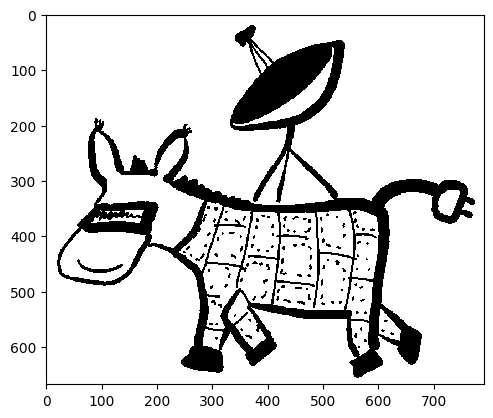

In [2]:
URL = "https://github.com/qi-rub/it-ss23-homework/raw/main/material/donkey.png"
ORIGINAL = plt.imread(io.BytesIO(urllib.request.urlopen(URL).read()))

# remove alpha channel
if ORIGINAL.shape[2] == 4:
    alpha = ORIGINAL[:, :, 3:]
    ORIGINAL = ORIGINAL[:, :, :3] * alpha + (1 - alpha)

# convert to black & white
WHITE_THRESHOLD = 0.8
ORIGINAL = np.where(ORIGINAL[:, :, :3].max(axis=2) > WHITE_THRESHOLD, 0, 1)

# show the figure
plt.imshow(ORIGINAL, cmap=plt.get_cmap("binary"), interpolation="none")
plt.show()

All inputs and outputs should be 2d arrays that contain only zeros and ones (corresponding to black&white images).
For example:

In [3]:
ORIGINAL.shape

(668, 791)

# The Noise Channel

The following function should model a noise channel with probability of bit flip $f$.
<span style="background-color: yellow">Right now it does nothing -- can you fix this?</span>

*Hint: Never modify an input parameter. If you really need to, make a copy (`output = input.copy()`) before you start modifying.*

In [4]:
set(ORIGINAL.flatten())

{np.int64(0), np.int64(1)}

In [13]:
for i in ORIGINAL.flatten():


SyntaxError: incomplete input (ipython-input-2351868359.py, line 2)

In [15]:
def noise_channel(f, input):
    # TODO

    output = input.copy()

    for i in output.flatten:
      r = random.uniform(0, 1)
      if f <= r:
        i = 1- i

    return output

You can test your implementation with the following code:

In [ ]:
NOISE_RATE = 0.1
output = noise_channel(NOISE_RATE, ORIGINAL)

f_est = np.mean(output != ORIGINAL)
print(f"{NOISE_RATE:3.0%} bit flips expected")
print(f"{f_est:3.0%} bit flips detected")

10% bit flips expected
 0% bit flips detected


# The Repetition Code

The following two functions should implement the repetition code $R_3$.
<span style="background-color: yellow">Right now these functions do nothing at all either -- can you fix this?</span>

In [ ]:
def encode(source):
    # TODO

    return source


def decode(received):
    # TODO

    return received

You can test your solution with the following code:

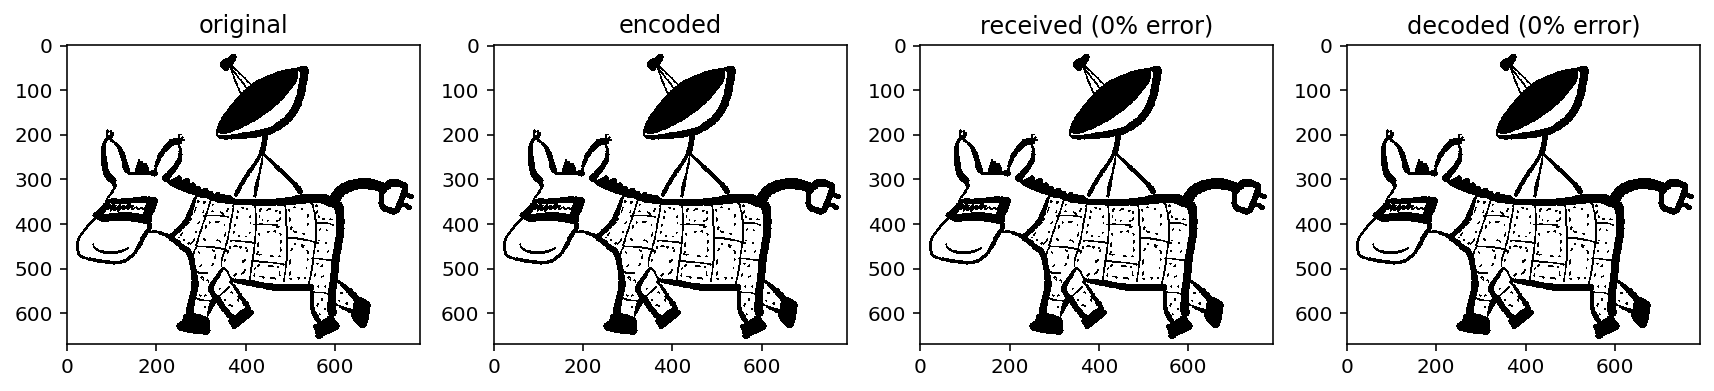

In [ ]:
# simulate channel
encoded = encode(ORIGINAL)

received = noise_channel(NOISE_RATE, encoded)
assert received.shape == encoded.shape, "Noise channel should not change image size."

decoded = decode(received)
assert (
    decoded.shape == ORIGINAL.shape
), "Decoder should produce image of same size as the original."


# compute statistics
f_raw = np.mean(received != encoded)
f_dec = np.mean(decoded != ORIGINAL)

# plot pictures
fig, row = plt.subplots(1, 4, figsize=(12, 12))

row[0].set_title("original")
row[0].imshow(ORIGINAL, cmap=plt.get_cmap("binary"), interpolation="none")

row[1].set_title("encoded")
row[1].imshow(encoded, cmap=plt.get_cmap("binary"), interpolation="none")

row[2].set_title(f"received ({f_raw:.0%} error)")
row[2].imshow(received, cmap=plt.get_cmap("binary"), interpolation="none")

row[3].set_title(f"decoded ({f_dec:.0%} error)")
row[3].imshow(decoded, cmap=plt.get_cmap("binary"), interpolation="none")

fig.tight_layout()

Does the output look similar to Figure 1.11 in [MacKay's book](http://www.inference.org.uk/itprnn/book.pdf)?

**Bonus challenges (completely optional):**
1. Change your code to implement the repetition code $R_5$.
2. Change your code to implement the repetition code $R_k$ for general $k$. How does the error of the decoded image change as a function of $f$ and $k$?